In [140]:
# Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder

In [141]:
# Reading the dataset to dataframe
df = pd.read_csv('supermarket-sales-data.csv')
df.head()

,InvoiceID,Branch,CustomerType,Gender,ProductType,UnitPrice,Quantity,Tax,Total,PaymentType,Rating
0,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,UPI,9.1
1,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,9.6
2,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,7.4
3,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,UPI,8.4
4,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,UPI,5.3


In [142]:
# All the customer IDs are different, hence can be dropped
print(df.shape)
sum(df['InvoiceID'].unique() == df['InvoiceID'])

(1000, 11)


1000

In [143]:
df.drop(columns = ['InvoiceID'], axis = 1, inplace = True)
df.head()

,Branch,CustomerType,Gender,ProductType,UnitPrice,Quantity,Tax,Total,PaymentType,Rating
0,A,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,UPI,9.1
1,C,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,9.6
2,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,7.4
3,A,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,UPI,8.4
4,A,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,UPI,5.3


#### For Gender

In [144]:
temp = df.copy()
ohe = OneHotEncoder(sparse_output=False)
X_ohe = ohe.fit_transform(temp.iloc[:,[0,1,3,8]])
ohe_df = pd.DataFrame(data = X_ohe, columns=ohe.get_feature_names_out())

In [145]:
df_gender = pd.concat([ohe_df, temp.iloc[:,[4,5,6,7,9,2]]] , axis = 1)
df_gender.head()

,Branch_A,Branch_B,Branch_C,CustomerType_Member,CustomerType_Normal,ProductType_Electronic accessories,ProductType_Fashion accessories,ProductType_Food and beverages,ProductType_Health and beauty,ProductType_Home and lifestyle,ProductType_Sports and travel,PaymentType_Cash,PaymentType_Credit card,PaymentType_UPI,UnitPrice,Quantity,Tax,Total,Rating,Gender
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,74.69,7,26.1415,548.9715,9.1,Female
1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,15.28,5,3.8200,80.2200,9.6,Female
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,46.33,7,16.2155,340.5255,7.4,Male
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,58.22,8,23.2880,489.0480,8.4,Male
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,86.31,7,30.2085,634.3785,5.3,Male


In [146]:
# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    df_gender.iloc[:,:-1], df_gender.iloc[:,-1], test_size=0.3, random_state=680)

In [147]:
# GridSearch Decision Tree Model
# TN is {0,0}, FN is {1,0}, TP {1,1} and FP {0,1}

clf1 = DecisionTreeClassifier(random_state = 680)
params = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':[3,4,5,6,7,8,9,10]
}
newclf1 = GridSearchCV(clf1, params, cv=5, n_jobs=-1)
newclf1.fit(X_train, y_train)
y_pred = newclf1.predict(X_test)
newconfmat = confusion_matrix(y_test, y_pred)
print(newclf1.best_params_,'\n')
print(f'Confusion Matrix:\n{newconfmat}\n')

tn, fp, fn, tp = newconfmat.ravel()
precision1 = round(tp/(tp+fp),3)
recall1 = round(tp/(tp+fn),3)
accuracy1= round((tp+tn)/(tp+tn+fp+fn),3)
print(f'Overall accuracy: {accuracy1}\nPrecision : {precision1}\nRecall : {recall1}')

{'criterion': 'gini', 'max_depth': 9} 

Confusion Matrix:
[[71 84]
 [64 81]]

Overall accuracy: 0.507
Precision : 0.491
Recall : 0.559


In [148]:
# GridSearch Random Forest Model
# TN is {0,0}, FN is {1,0}, TP {1,1} and FP {0,1}

clf2 = RandomForestClassifier(random_state = 680)
params = {
    'n_estimators':[50,100,200,500],
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_features':['sqrt', 'log2', None]
}
newclf2 = GridSearchCV(clf2, params, cv=5, n_jobs=-1)
newclf2.fit(X_train, y_train)
y_pred = newclf2.predict(X_test)
newconfmat = confusion_matrix(y_test, y_pred)
print(newclf2.best_params_,'\n')
print(f'Confusion Matrix:\n{newconfmat}\n')

tn, fp, fn, tp = newconfmat.ravel()
precision2 = round(tp/(tp+fp),3)
recall2 = round(tp/(tp+fn),3)
accuracy2= round((tp+tn)/(tp+tn+fp+fn),3)
print(f'Overall accuracy: {accuracy2}\nPrecision : {precision2}\nRecall : {recall2}')

{'criterion': 'entropy', 'max_features': None, 'n_estimators': 200} 

Confusion Matrix:
[[71 84]
 [62 83]]

Overall accuracy: 0.513
Precision : 0.497
Recall : 0.572


In [158]:
data1 = [['DecisionTreeClassifier', newclf1.best_params_, accuracy1, precision1, recall1],
        ['RandomForestClassifier', newclf2.best_params_, accuracy2, precision2, recall2]]

In [159]:
report1 = pd.DataFrame(data1, columns= ['Model', 'Parameters', 'Overall accuracy', 'Precision', 'Recall'])
report1

,Model,Parameters,Overall accuracy,Precision,Recall
0,DecisionTreeClassifier,"{'criterion': 'gini', 'max_depth': 9}",0.507,0.491,0.559
1,RandomForestClassifier,"{'criterion': 'entropy', 'max_features': None,...",0.513,0.497,0.572


#### For Rating

In [150]:
temp = df.copy()
ohe = OneHotEncoder(sparse_output=False)
X_ohe = ohe.fit_transform(temp.iloc[:,[0,1,2,3,8]])
ohe_df = pd.DataFrame(data = X_ohe, columns=ohe.get_feature_names_out())
df_rating = pd.concat([ohe_df, temp.iloc[:,[4,5,6,7,9]]] , axis = 1)
df_rating.head()

,Branch_A,Branch_B,Branch_C,CustomerType_Member,CustomerType_Normal,Gender_Female,Gender_Male,ProductType_Electronic accessories,ProductType_Fashion accessories,ProductType_Food and beverages,...,ProductType_Home and lifestyle,ProductType_Sports and travel,PaymentType_Cash,PaymentType_Credit card,PaymentType_UPI,UnitPrice,Quantity,Tax,Total,Rating
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,74.69,7,26.1415,548.9715,9.1
1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,15.28,5,3.8200,80.2200,9.6
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,46.33,7,16.2155,340.5255,7.4
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,58.22,8,23.2880,489.0480,8.4
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,86.31,7,30.2085,634.3785,5.3


In [151]:
# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    df_rating.iloc[:,:-1], df_rating.iloc[:,-1], test_size=0.3, random_state=680)

In [152]:
# GridSearch Decision Tree Model

reg1 = DecisionTreeRegressor(random_state = 680)
params = {
    'criterion':['squared_error', 'absolute_error', 'poisson'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10]
}
newreg1 = GridSearchCV(reg1, params, cv=5, n_jobs=-1)
newreg1.fit(X_train, y_train)
y_pred = newreg1.predict(X_test)
rmse1 = round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
print(newreg1.best_params_,'\n')
print(f'Root Mean Squared Error: {rmse1}\n')

{'criterion': 'squared_error', 'max_depth': 1} 

Root Mean Squared Error: 1.742



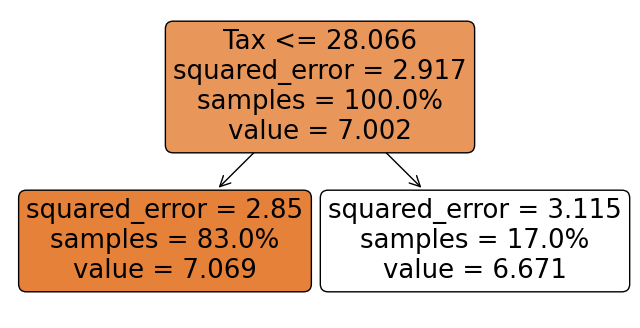

In [153]:
fig = plt.figure(figsize=(8, 4))
_ = tree.plot_tree(
    newreg1.best_estimator_,
    feature_names=X_train.columns,
    filled=True,
    rounded=True,
    proportion=True,
)

In [154]:
# Default Linear Regression Model

reg2 = LinearRegression()
reg2.fit(X_train, y_train)
y_pred = reg2.predict(X_test)
rmse2 = round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
print(f'Root Mean Squared Error: {rmse2}\n')

Root Mean Squared Error: 1.755



In [156]:
data2 = [['DecisionTreeRegressor', newreg1.best_params_, rmse1],['LinearRegression', 'Default', rmse2]]

In [157]:
report2 = pd.DataFrame(data2, columns= ['Model', 'Parameters', 'RMSE'])
report2

,Model,Parameters,RMSE
0,DecisionTreeRegressor,"{'criterion': 'squared_error', 'max_depth': 1}",1.742
1,LinearRegression,Default,1.755
